In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [31]:
constructor_results = pd.read_csv("/Users/sophiaxiao/Documents/GitHub/emoryqtm151/Lecture 20/data_raw/constructor_results.csv")
races = pd.read_csv("/Users/sophiaxiao/Documents/GitHub/emoryqtm151/Lecture 19/data_raw/races.csv")
constructors = pd.read_csv("/Users/sophiaxiao/Documents/GitHub/emoryqtm151/Lecture 20/data_raw/constructors.csv")

In [62]:
# Previewing the data
constructor_results.head()
races.head()
constructors.head()

print(constructor_results.columns)
print(races.columns)

Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], dtype='object')
Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [180]:
# join constructor_results and year, raceId columns from races dataset (we just need year data; joining on raceId)
data = pd.merge(constructor_results, races[["year","raceId"]])
data = pd.merge(data, constructors[["constructorId", "constructorRef", "name"]])
data.sort_values(by = "year")

df1 = data.groupby(["constructorId", "constructorRef", "year"]).agg({"points": "sum"})

df1




points
constructorId constructorRef year        
1             mclaren        1968     0.0
                             1971    10.0
                             1972    53.0
                             1973    58.0
                             1974    75.0
...                                   ...
213           alphatauri     2020   107.0
                             2021   142.0
                             2022    35.0
214           alpine         2021   155.0
                             2022   173.0

[929 rows x 1 columns]

In [181]:
df3 = df1.pivot_table(index="year", columns=["constructorId", "constructorRef"], values="points")
df3

constructorId,1,2,3,4,5,6,7,8,9,10,...,204,205,206,207,208,209,210,211,213,214
constructorRef,mclaren,bmw_sauber,williams,renault,toro_rosso,ferrari,toyota,super_aguri,red_bull,force_india,...,brabham-alfa_romeo,lotus_racing,marussia,caterham,lotus_f1,manor,haas,racing_point,alphatauri,alpine
year,,,,,,,,,,,,,,,,,,,,,
1956,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,62.0,NaN,7.0,122.0,33.0,571.0,NaN,NaN,419.0,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN
2019,145.0,NaN,1.0,91.0,85.0,504.0,NaN,NaN,417.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,73.0,NaN,NaN


<AxesSubplot:xlabel='year'>

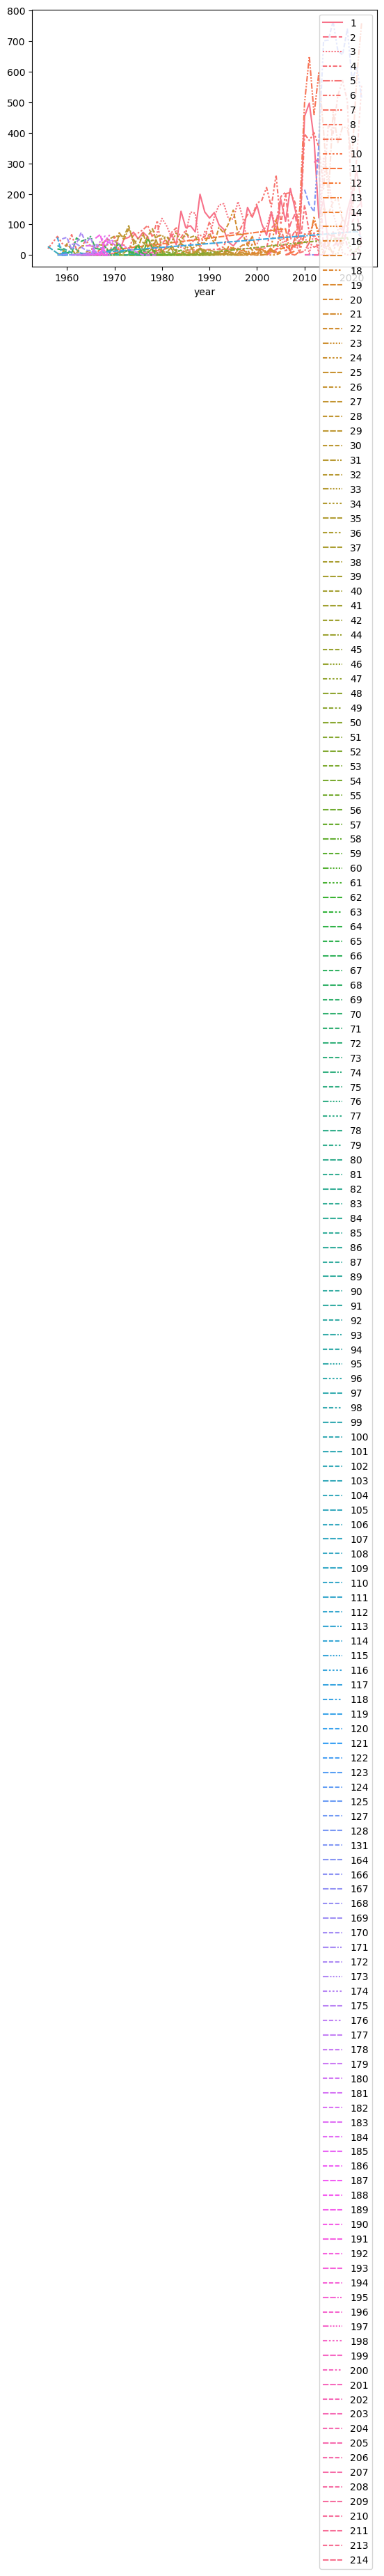

In [196]:
sns.lineplot(data = df3)

In [203]:
alt.Chart(df3).mark_line().encode(
    x='year:T',
    y='constructorId:Q',
    color='constructorId'
)

ValueError: Dataframe contains invalid column name: (1, 'mclaren'). Column names must be strings

alt.Chart(...)

In [177]:
# another method of unpivoting df1
df2 = df1.pivot_table(index=["constructorId", "constructorRef"], columns="year", values="points")
df2


,year,1956,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
constructorId,constructorRef,,,,,,,,,,,,,,,,,,,,,
1,mclaren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.0,181.0,27.0,76.0,30.0,62.0,145.0,202.0,275.0,159.0
2,bmw_sauber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,320.0,257.0,138.0,83.0,7.0,1.0,0.0,23.0,8.0
4,renault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,57.0,122.0,91.0,181.0,NaN,NaN
5,toro_rosso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,30.0,67.0,63.0,53.0,33.0,85.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,manor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
210,haas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.0,47.0,93.0,28.0,3.0,0.0,37.0
211,racing_point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73.0,210.0,NaN,NaN


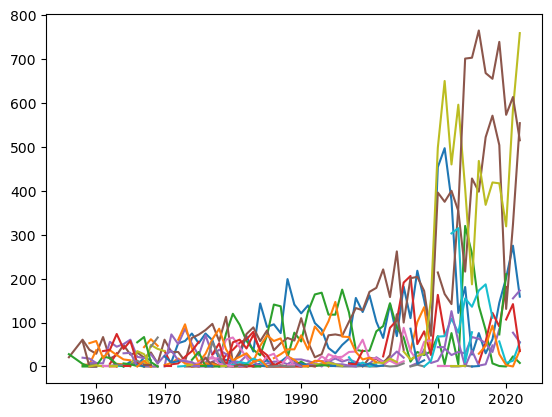

In [178]:
for i in range(len(df2)):
    plt.plot(df2.columns, df2.iloc[i, :])

In [179]:
# create dictionary of constructorId and constructor team name

constructors[["constructorId", "constructorRef"]]
construtors_dict = dict(zip(constructors.constructorId, constructors.constructorRef))
construtors_dict


{1: 'mclaren',
 2: 'bmw_sauber',
 3: 'williams',
 4: 'renault',
 5: 'toro_rosso',
 6: 'ferrari',
 7: 'toyota',
 8: 'super_aguri',
 9: 'red_bull',
 10: 'force_india',
 11: 'honda',
 12: 'spyker',
 13: 'mf1',
 14: 'spyker_mf1',
 15: 'sauber',
 16: 'bar',
 17: 'jordan',
 18: 'minardi',
 19: 'jaguar',
 20: 'prost',
 21: 'arrows',
 22: 'benetton',
 23: 'brawn',
 24: 'stewart',
 25: 'tyrrell',
 26: 'lola',
 27: 'ligier',
 28: 'forti',
 29: 'footwork',
 30: 'pacific',
 31: 'simtek',
 32: 'team_lotus',
 33: 'larrousse',
 34: 'brabham',
 35: 'dallara',
 36: 'fondmetal',
 37: 'march',
 38: 'moda',
 39: 'ags',
 40: 'lambo',
 41: 'leyton',
 42: 'coloni',
 44: 'eurobrun',
 45: 'osella',
 46: 'onyx',
 47: 'life',
 48: 'rial',
 49: 'zakspeed',
 50: 'ram',
 51: 'alfa',
 52: 'spirit',
 53: 'toleman',
 54: 'ats',
 55: 'theodore',
 56: 'fittipaldi',
 57: 'ensign',
 58: 'shadow',
 59: 'wolf',
 60: 'merzario',
 61: 'kauhsen',
 62: 'rebaque',
 63: 'surtees',
 64: 'hesketh',
 65: 'martini',
 66: 'brm',
 67: 